# Topic mining - vooronderzoek
In dit document voegen wij (afdeling topic mining) onze vooronderzoeks bevindingen samen.

In [1]:
try:
    !conda install --yes --prefix {sys.prefix} pandas numpy matplotlib bs4 WordCloud
except e:
    print("Something went wrong while trying to install required packages. Please install the packages manually before continuing with this notebook")
    raise e

Retrieving notices: ...working... done



EnvironmentLocationNotFound: Not a conda environment: C:\Users\luc\Dropbox\Fontys\sem4\{sys.prefix}



In [2]:
import sys
import requests

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud

## Data preperation

In [3]:
def scrapeTextFromWikipedia(url: str):
    '''
    Scrapes text from a wikipedia body, ignoring everything after the refrences heading.
    '''
    requestHeaders = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'
    }
    
    # request HTML source
    source = requests.get(url, headers=requestHeaders).text
    soup = BeautifulSoup(source, 'lxml')
    
    # parse source
    body = soup.find("main", {"id": "content"})
    text = [tag.text for tag in body.find_all(["h1", "h2", "h3", "h4", "h5", "h6", "p"])]
    text = text[0:text.index("References")]
    
    # write parsed source to file
    fname = url.split("/")[-1].lower() + ".txt"
    with open(fname, "w", encoding="utf-8") as file:
        file.write("\n".join(text))
        
    print(f"Written text from {url} to {fname}")

In [4]:
# scrapeEffectListFromYugipedia("https://en.wikipedia.org/wiki/Penguin")
# scrapeEffectListFromYugipedia("https://en.wikipedia.org/wiki/Dog")
# scrapeEffectListFromYugipedia("https://en.wikipedia.org/wiki/Bird")

In [5]:
corpus = [ "penguin.txt", "dog.txt", "bird.txt" ]
titles = [d.split(".")[0].title() for d in corpus]
text = []

for doc in corpus:
    with open(doc, "r", encoding="utf-8") as file:
        text.append(file.read())

In [6]:
df = pd.DataFrame({
    "docs": corpus,
    "titles": titles,
    "text": text
})
df.head(5)

,docs,titles,text
0,penguin.txt,Penguin,Penguin\n\n\nAptenodytes\nEudyptes\nEudyptula\...
1,dog.txt,Dog,Dog\n\n\nThe dog (Canis familiaris[4][5] or Ca...
2,bird.txt,Bird,Bird\n\n\n\n\nBirds are a group of warm-bloode...


## Tokenization -> Omar
Tokenization is one of the first step in any NLP pipeline. Tokenization is nothing but splitting the raw text into small chunks of words or sentences, called tokens

Word Tokenization: splits text by delimiters. Most basic

Sentence Tokenization: splits text into individual sentences. useful when the focus on the relationships between topics and their context in sentences.

Regex Tokenization: splits a string into substrings using a regular expression (helpful by cleaning)

N-gram Tokenization: splits text into contiguous sequences of n words. N-gram tokenization is useful when the focus of the analysis is on the frequency and co-occurrence of specific word sequences.
(Categorize)


The methods above are the most important ones. Other tokenization methods and documentation that we can use can be found on https://www.nltk.org/api/nltk.tokenize.html
Other methods are more for specific uses such as: splitting punctuation marks, spaces, contractions and hyphenated words.
Source:
https://towardsdatascience.com/dynamic-word-tokenization-with-regex-tokenizer-801ae839d1cd
https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis-ngram-tokenizer.html
https://www.nltk.org/api/nltk.tokenize.regexp.html

Ik ga als voorbeeld verschillende tokenization methodes toepassen aan de text van penguin.

In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from transformers import AutoTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('words', quiet=True)
nltk.download('tagsets', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('maxent_ne_chunker', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [8]:
# Reading the file
with open("penguin.txt", "r", encoding="utf-8") as penguin:
    Penguin_Test = penguin.read()

### Word tokenizing
Een voorbeeld van word tokenizing

In [9]:
words = word_tokenize(Penguin_Test)
print("Word tokenization:", words)

Word tokenization: ['Penguin', 'Aptenodytes', 'Eudyptes', 'Eudyptula', 'Megadyptes', 'Pygoscelis', 'Spheniscus', 'For', 'prehistoric', 'genera', ',', 'see', 'Systematics', 'Penguins', '(', 'order', 'Sphenisciformes', '/sfɪˈnɪsɪfɔːrmiːz/', ',', 'family', 'Spheniscidae', '/sfɪˈnɪsɪdiː/', ')', 'are', 'a', 'group', 'of', 'aquatic', 'flightless', 'birds', '.', 'They', 'live', 'almost', 'exclusively', 'in', 'the', 'Southern', 'Hemisphere', ':', 'only', 'one', 'species', ',', 'the', 'Galápagos', 'penguin', ',', 'is', 'found', 'north', 'of', 'the', 'Equator', '.', 'Highly', 'adapted', 'for', 'life', 'in', 'the', 'water', ',', 'penguins', 'have', 'countershaded', 'dark', 'and', 'white', 'plumage', 'and', 'flippers', 'for', 'swimming', '.', 'Most', 'penguins', 'feed', 'on', 'krill', ',', 'fish', ',', 'squid', 'and', 'other', 'forms', 'of', 'sea', 'life', 'which', 'they', 'catch', 'with', 'their', 'bills', 'and', 'swallow', 'whole', 'while', 'swimming', '.', 'A', 'penguin', 'has', 'a', 'spiny', '

### Lemmatization
Woorden terug naar stam zetten, maar het werkt niet!!

In [10]:
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in words]
print("Lemmas:", lemmas)

Lemmas: ['Penguin', 'Aptenodytes', 'Eudyptes', 'Eudyptula', 'Megadyptes', 'Pygoscelis', 'Spheniscus', 'For', 'prehistoric', 'genus', ',', 'see', 'Systematics', 'Penguins', '(', 'order', 'Sphenisciformes', '/sfɪˈnɪsɪfɔːrmiːz/', ',', 'family', 'Spheniscidae', '/sfɪˈnɪsɪdiː/', ')', 'are', 'a', 'group', 'of', 'aquatic', 'flightless', 'bird', '.', 'They', 'live', 'almost', 'exclusively', 'in', 'the', 'Southern', 'Hemisphere', ':', 'only', 'one', 'specie', ',', 'the', 'Galápagos', 'penguin', ',', 'is', 'found', 'north', 'of', 'the', 'Equator', '.', 'Highly', 'adapted', 'for', 'life', 'in', 'the', 'water', ',', 'penguin', 'have', 'countershaded', 'dark', 'and', 'white', 'plumage', 'and', 'flipper', 'for', 'swimming', '.', 'Most', 'penguin', 'feed', 'on', 'krill', ',', 'fish', ',', 'squid', 'and', 'other', 'form', 'of', 'sea', 'life', 'which', 'they', 'catch', 'with', 'their', 'bill', 'and', 'swallow', 'whole', 'while', 'swimming', '.', 'A', 'penguin', 'ha', 'a', 'spiny', 'tongue', 'and', 'pow

### Sentence tokenizing
Een voorbeeld van zin tokenization

In [11]:
sentences = sent_tokenize(Penguin_Test)
print("Sentence tokenization:", sentences)

Sentence tokenization: ['Penguin\n\n\nAptenodytes\nEudyptes\nEudyptula\nMegadyptes\nPygoscelis\nSpheniscus\nFor prehistoric genera, see Systematics\n\nPenguins (order Sphenisciformes /sfɪˈnɪsɪfɔːrmiːz/, family Spheniscidae /sfɪˈnɪsɪdiː/) are a group of aquatic flightless birds.', 'They live almost exclusively in the Southern Hemisphere: only one species, the Galápagos penguin, is found north of the Equator.', 'Highly adapted for life in the water, penguins have countershaded dark and white plumage and flippers for swimming.', 'Most penguins feed on krill, fish, squid and other forms of sea life which they catch with their bills and swallow whole while swimming.', 'A penguin has a spiny tongue and powerful jaws to grip slippery prey.', '[4]\n\nThey spend roughly half of their lives on land and the other half in the sea.', 'The largest living species is the emperor penguin (Aptenodytes forsteri):[5] on average, adults are about 1.1\xa0m (3\xa0ft 7\xa0in) tall and weigh 35\xa0kg (77\xa0lb

### POS (Part of speach) tagging
Nuttig bij data opschonen. overbodig woordjes en syntaxen eruit halen

In [12]:
pos_tags = nltk.pos_tag(words)
print("POS tags:", pos_tags)

POS tags: [('Penguin', 'NNP'), ('Aptenodytes', 'NNP'), ('Eudyptes', 'NNP'), ('Eudyptula', 'NNP'), ('Megadyptes', 'NNP'), ('Pygoscelis', 'NNP'), ('Spheniscus', 'NNP'), ('For', 'IN'), ('prehistoric', 'JJ'), ('genera', 'NN'), (',', ','), ('see', 'VBP'), ('Systematics', 'NNPS'), ('Penguins', 'NNP'), ('(', '('), ('order', 'NN'), ('Sphenisciformes', 'NNP'), ('/sfɪˈnɪsɪfɔːrmiːz/', 'NNP'), (',', ','), ('family', 'NN'), ('Spheniscidae', 'NNP'), ('/sfɪˈnɪsɪdiː/', 'NNP'), (')', ')'), ('are', 'VBP'), ('a', 'DT'), ('group', 'NN'), ('of', 'IN'), ('aquatic', 'JJ'), ('flightless', 'NN'), ('birds', 'NNS'), ('.', '.'), ('They', 'PRP'), ('live', 'VBP'), ('almost', 'RB'), ('exclusively', 'RB'), ('in', 'IN'), ('the', 'DT'), ('Southern', 'NNP'), ('Hemisphere', 'NNP'), (':', ':'), ('only', 'RB'), ('one', 'CD'), ('species', 'NNS'), (',', ','), ('the', 'DT'), ('Galápagos', 'NNP'), ('penguin', 'NN'), (',', ','), ('is', 'VBZ'), ('found', 'JJ'), ('north', 'RB'), ('of', 'IN'), ('the', 'DT'), ('Equator', 'NNP'), ('

### Named entity recognition
Een soort woordenboek met bekende namen voor mensen, organizaties, etc.
NER is the task of recognizing named entities in a text. These entities can be the names of people, locations, or organizations. The task is formulated as labeling each token with a class for each named entity and a class named "0" for tokens that do not contain any entities. The input for this task is text and the output is the annotated text with named entities.

In [13]:
ner_tags = nltk.ne_chunk(pos_tags)
print("NER tags:", ner_tags)

NER tags: (S
  (PERSON Penguin/NNP)
  (ORGANIZATION
    Aptenodytes/NNP
    Eudyptes/NNP
    Eudyptula/NNP
    Megadyptes/NNP
    Pygoscelis/NNP
    Spheniscus/NNP
    For/IN)
  prehistoric/JJ
  genera/NN
  ,/,
  see/VBP
  (ORGANIZATION Systematics/NNPS Penguins/NNP)
  (/(
  order/NN
  (PERSON Sphenisciformes/NNP /sfɪˈnɪsɪfɔːrmiːz//NNP)
  ,/,
  family/NN
  (PERSON Spheniscidae/NNP)
  /sfɪˈnɪsɪdiː//NNP
  )/)
  are/VBP
  a/DT
  group/NN
  of/IN
  aquatic/JJ
  flightless/NN
  birds/NNS
  ./.
  They/PRP
  live/VBP
  almost/RB
  exclusively/RB
  in/IN
  the/DT
  (LOCATION Southern/NNP Hemisphere/NNP)
  :/:
  only/RB
  one/CD
  species/NNS
  ,/,
  the/DT
  (ORGANIZATION Galápagos/NNP)
  penguin/NN
  ,/,
  is/VBZ
  found/JJ
  north/RB
  of/IN
  the/DT
  Equator/NNP
  ./.
  (PERSON Highly/NNP)
  adapted/VBD
  for/IN
  life/NN
  in/IN
  the/DT
  water/NN
  ,/,
  penguins/NNS
  have/VBP
  countershaded/VBN
  dark/NN
  and/CC
  white/JJ
  plumage/NN
  and/CC
  flippers/NNS
  for/IN
  swimming/VBG

### Stop words removal
Nuttig in combinatie met POS

In [14]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered words:", filtered_words)

Filtered words: ['Penguin', 'Aptenodytes', 'Eudyptes', 'Eudyptula', 'Megadyptes', 'Pygoscelis', 'Spheniscus', 'prehistoric', 'genera', ',', 'see', 'Systematics', 'Penguins', '(', 'order', 'Sphenisciformes', '/sfɪˈnɪsɪfɔːrmiːz/', ',', 'family', 'Spheniscidae', '/sfɪˈnɪsɪdiː/', ')', 'group', 'aquatic', 'flightless', 'birds', '.', 'live', 'almost', 'exclusively', 'Southern', 'Hemisphere', ':', 'one', 'species', ',', 'Galápagos', 'penguin', ',', 'found', 'north', 'Equator', '.', 'Highly', 'adapted', 'life', 'water', ',', 'penguins', 'countershaded', 'dark', 'white', 'plumage', 'flippers', 'swimming', '.', 'penguins', 'feed', 'krill', ',', 'fish', ',', 'squid', 'forms', 'sea', 'life', 'catch', 'bills', 'swallow', 'whole', 'swimming', '.', 'penguin', 'spiny', 'tongue', 'powerful', 'jaws', 'grip', 'slippery', 'prey', '.', '[', '4', ']', 'spend', 'roughly', 'half', 'lives', 'land', 'half', 'sea', '.', 'largest', 'living', 'species', 'emperor', 'penguin', '(', 'Aptenodytes', 'forsteri', ')', ':

### Conclusie
Er zijn nog veel voorbeelden en nuttige methodes die wij zouden kunnen gebruiken. We moeten straks kijken naar waar hebben wij behoefte aan in onze project.

## Visualization -> Luc

![](Topic_modelling_-_vooronderzoek.svg)

### Wordcloud example

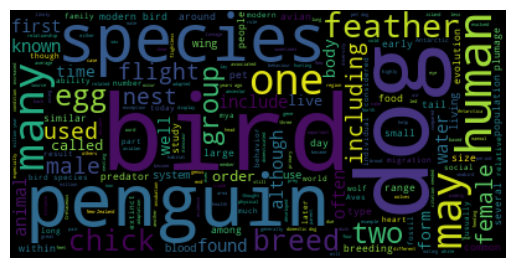

In [15]:
wordcloud = WordCloud().generate(df.text.str.cat(sep=' '))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams["figure.figsize"] = (4,3)
plt.show()

### Matplotlib example
Een simpele scatter plot

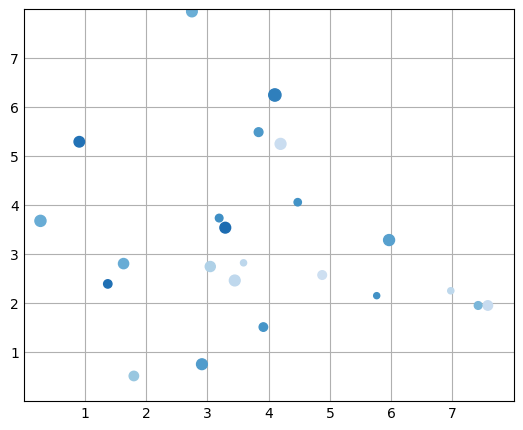

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### Seaborn example
De pairplot van seaborn is zeer krachtig, het geeft snel veel inzicht in numerische data

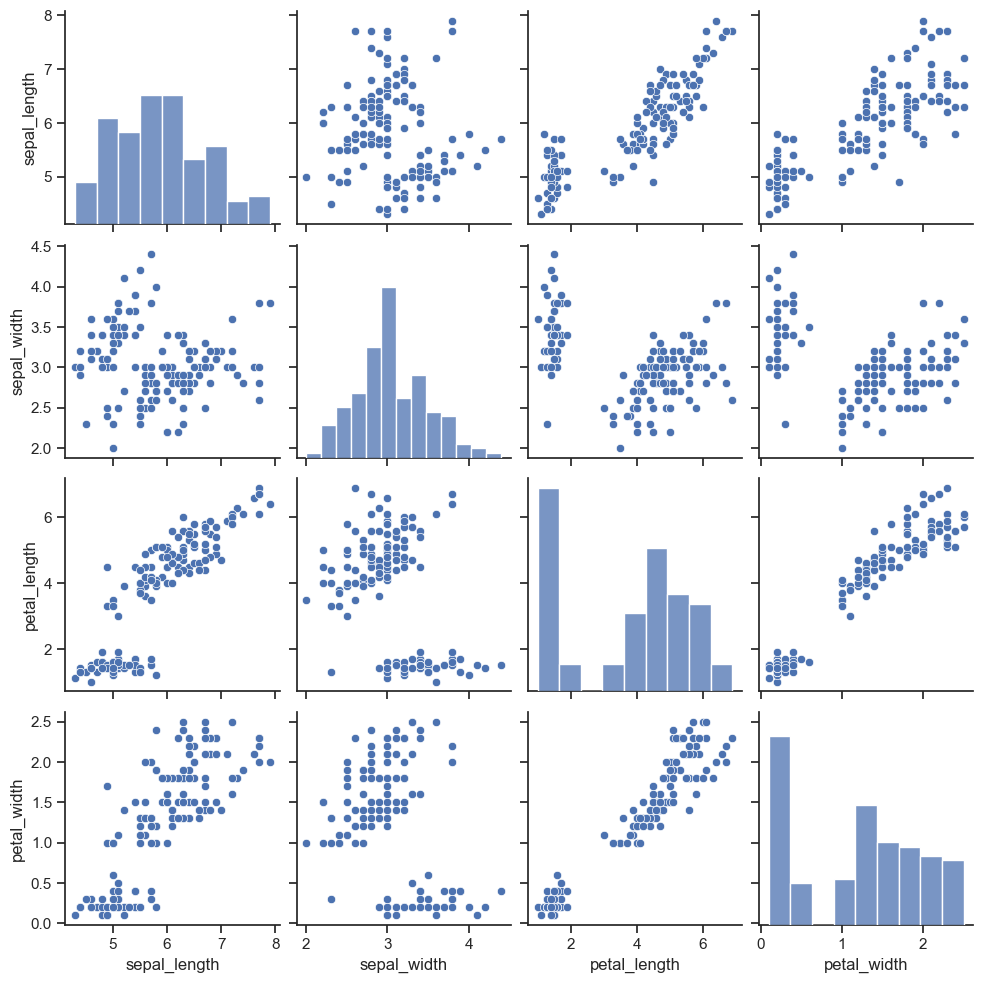

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)
plt.show()

### Bokeh examples

Voor Bokeh verwijs ik naar de [demo](https://demo.bokeh.org/) pagina van bokeh

### IPyWidgets
Voorbeeld van inzicht krijgen in grote aantal strings, in dit geval word tokens

In [18]:
import ipywidgets as widgets

vis_tokens = sorted(set(words))
n_vis_tokens = len(vis_tokens)

# Initialize the index of the first item to display
current_index = 0

# Create widgets
total_vis_tokens = widgets.Label(value=f"{n_vis_tokens} total")
next_button = widgets.Button(
    description='Next',
    button_style='info',
    tooltip='next'
)
prev_button = widgets.Button(
    description='Previous',
    button_style='info',
    tooltip='prev'
)
grid_item_count_label = widgets.Label(value="Tokens on screen:")
grid_item_count = widgets.BoundedIntText(
    value=200,
    min=1,
    max=n_vis_tokens,
    step=1,
    description=''
)
grid_col_count_label = widgets.Label(value="Columns:")
grid_col_count = widgets.BoundedIntText(
    value=10,
    min=1,
    max=12,
    step=1,
    description=''
)
grid_box = widgets.GridBox(
    [widgets.Label(t) for t in vis_tokens[current_index:current_index+grid_item_count.value]], 
    layout=widgets.Layout(
        grid_template_columns=f"repeat({grid_col_count.value}, {100/grid_col_count.value}%)"
    )
)
controls = widgets.Box([total_vis_tokens, prev_button, next_button, grid_item_count_label, grid_item_count, grid_col_count_label, grid_col_count])

# Update events
def scroll_grid(e):
    global current_index, grid_item_count, grid_box, controls
    
    if e.tooltip == "next":
        current_index += grid_item_count.value
    elif e.tooltip == "prev":
        current_index -= grid_item_count.value
    
    if current_index < 0:
        current_index = n_vis_tokens - grid_item_count.value
    if current_index >= n_vis_tokens:
        current_index = 0
    
    grid_box.children = [widgets.Label(t) for t in vis_tokens[current_index:current_index+grid_item_count.value]]
    
def on_grid_item_count_change(e):
    global current_index, grid_item_count, grid_box
    grid_box.children = [widgets.Label(t) for t in vis_tokens[current_index:current_index+grid_item_count.value]]
    
def on_grid_col_count_change(e):
    global grid_columns, grid_layout, current_index, grid_item_count, grid_box
    grid_box.layout.grid_template_columns = f"repeat({grid_col_count.value}, {100/grid_col_count.value}%)"
      
next_button.on_click(scroll_grid)
prev_button.on_click(scroll_grid)
grid_item_count.observe(on_grid_item_count_change)
grid_col_count.observe(on_grid_col_count_change)

# Styleing
spacing = "5px"
prev_button.layout.margin = spacing
next_button.layout.margin = spacing
grid_item_count_label.layout.margin = spacing
grid_item_count.layout.margin = spacing
grid_col_count_label.layout.margin = spacing
grid_col_count.layout.margin = spacing
controls.layout.padding = spacing
controls.layout.pointer_events = "none"
grid_box.layout.padding = spacing
grid_box.layout.border = "1px solid"

# Display the grid
widgets.VBox([controls, grid_box])

### UMAP example

In [19]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper, LinearColorMapper, ColorBar, LabelSet, Label
from bokeh.palettes import Spectral10
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
output_notebook()

Loading BokehJS ...

In [28]:
scaler = StandardScaler()
reducer = umap.UMAP()

reversed_tfidf_df = tfidf_df.T
scaled_tfidf_data = scaler.fit_transform(reversed_tfidf_df)
embedding = reducer.fit_transform(scaled_tfidf_data)
embeddingdf = pd.DataFrame(embedding, columns=("x", "y"))
embeddingdf["token"] = reversed_tfidf_df.index
embeddingdf["highest_scoring_doc"] = reversed_tfidf_df.idxmax(axis=1).values

In [29]:
reversed_tfidf_df

titles,Penguin,Dog,Bird
000,0.009630,0.012914,0.001751
10,0.005778,0.014529,0.004378
100,0.005778,0.003229,0.001751
101,0.001926,0.001614,0.001751
102,0.001926,0.003229,0.000876
...,...,...,...
zoologist,0.000000,0.002733,0.000000
zoonotic,0.000000,0.000000,0.001482
zz,0.000000,0.000000,0.001482
ˈeɪviːz,0.000000,0.000000,0.001482


In [30]:
datasource = ColumnDataSource(embeddingdf)
color_mapping = CategoricalColorMapper(
    factors=list(set(embeddingdf["highest_scoring_doc"].values)),
    palette=(
        "#fc2c03", # R
        "#35fc03", # G
        "#0339fc"  # B
    )
)

plot_figure = figure(
    title='UMAP projection of TF-IDF vectorized words from the complete corpus',
    width=1000,
    height=800,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='highest_scoring_doc', transform=color_mapping),
    size=4
)
plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div style="border: 1px black;">
        <span style='font-size: 12px'>@token</span>
    </div>
</div>
"""))

labels = [ "penguin", "dog", "bird" ]
for l in labels:
    label = Label(
        x=embeddingdf[embeddingdf.token == l].x.values[0], 
        y=embeddingdf[embeddingdf.token == l].y.values[0], 
        x_offset=2, 
        y_offset=2, 
        text=f"{l} (scores highest on '{embeddingdf[embeddingdf.token == l].highest_scoring_doc.values[0]}')",
        background_fill_color='white',
        background_fill_alpha=0.5
    )
    plot_figure.add_layout(label)

color_bar = ColorBar(
    color_mapper = color_mapping,
    title = 'Highest scoring document'
)
plot_figure.add_layout(color_bar, 'right')

show(plot_figure)

## Vectorization -> Twan

Tekstvectorisatie, ook wel bekend als tekstrepresentatie, is het proces van het omzetten van tekstuele gegevens in een numerieke vorm die kan worden verwerkt door computerprogramma's en machine learning-algoritmen. Hier onder heb ik kort de drie belangrijkste methode van tekstvectorisatie beschreven. Kijk uit waar je het toepast wanneer je text vectorized, het kan veel impact hebben op performance.

### Bag-of-words
Een veelgebruikte techniek voor tekstvectorisatie, waarbij elk woord in de tekst wordt beschouwd als een aparte functie of "feature". De tekst wordt vervolgens voorgesteld als een vector met de frequenties van elk woord in de tekst. Deze aanpak heeft echter enkele beperkingen, zoals het negeren van de semantische betekenis van woorden en het falen om de volgorde van woorden in de tekst te behouden. 

https://en.wikipedia.org/wiki/Bag-of-words_model 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.text)
dfbow = pd.DataFrame(X.toarray(), index=df.titles, columns=vectorizer.get_feature_names_out())
dfbow.head()

,000,10,100,101,102,103,104,105,106,107,...,zhengi,zhongjianornis,zone,zones,zoo,zoologist,zoonotic,zz,ˈeɪviːz,יונה
titles,,,,,,,,,,,,,,,,,,,,,
Penguin,5,3,3,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
Dog,8,9,2,1,2,2,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
Bird,2,5,2,2,1,1,2,2,2,1,...,1,1,0,1,0,0,1,1,1,1


### Word embedding
Een andere techniek die wordt gebruikt voor tekstvectorisatie, waarbij woorden worden omgezet in dichte numerieke vectoren die hun semantische betekenis behouden. Deze vectoren kunnen vervolgens worden gebruikt als input voor machine learning-modellen om taakspecifieke taken uit te voeren, zoals tekstclassificatie, sentimentanalyse en machinale vertaling. Embeddings kunnen worden gegenereerd met behulp van algoritmen zoals Word2Vec, GloVe of FastText. 

https://en.wikipedia.org/wiki/Word_embedding 

In [22]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Preprocess text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Stem words
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

In [23]:

# Apply preprocessing to text data
df['processed_text'] = df['text'].apply(preprocess_text)

# Train word2vec model
model = Word2Vec(df['processed_text'], min_count=1)

# Get average vector for each sentence
we_list = []
for i in range(len(df)):
    sentence_vectors = []
    for word in df['processed_text'][i]:
        if word in model.wv.key_to_index:
            sentence_vectors.append(model.wv[word])
    if len(sentence_vectors) == 0:
        sentence_vectors.append(np.zeros(model.vector_size))
    sentence_vector = np.mean(sentence_vectors, axis=0)
    we_list.append(sentence_vector)

# Create column names for DataFrame
col_names = ['dim_' + str(i) for i in range(model.vector_size)]

# Convert list of vectors to DataFrame
we_df = pd.DataFrame(we_list, index=df.titles, columns=col_names)
we_df.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
titles,,,,,,,,,,,,,,,,,,,,,
Penguin,-0.199302,0.163287,0.135737,0.171629,-0.013760,-0.332742,0.080303,0.369571,-0.202996,-0.106290,...,0.235047,0.098221,0.061091,0.063762,0.448437,0.151041,0.065740,-0.215666,0.127907,0.043213
Dog,-0.225629,0.185146,0.153716,0.192752,-0.015575,-0.375976,0.091420,0.418334,-0.229301,-0.120436,...,0.266057,0.111478,0.068799,0.071050,0.506902,0.171372,0.074377,-0.244868,0.144382,0.048213
Bird,-0.205841,0.169092,0.140744,0.176930,-0.013865,-0.343523,0.083347,0.382393,-0.209954,-0.109635,...,0.243345,0.101025,0.063392,0.065441,0.463232,0.156215,0.068650,-0.223141,0.131867,0.044541


### TF-IDF
Term Frequency-Inverse Document Frequency (TF-IDF) is een methode die gebaseerd is op het idee dat woorden die vaak voorkomen in een document, maar zeldzaam zijn in andere documenten, een hogere relevantie hebben voor het document waarin ze voorkomen. TF-IDF combineert daarom twee componenten: 

Term Frequency (TF): de frequentie waarmee een bepaald woord voorkomt in een document. Dit wordt berekend door het aantal keer dat een woord voorkomt te delen door het totale aantal woorden in het document. Inverse Document 

Frequency (IDF): een maatstaf voor de relevantie van een woord in het corpus als geheel. IDF geeft een lager gewicht aan woorden die in veel documenten voorkomen en een hoger gewicht aan woorden die slechts in enkele documenten voorkomen. Dit wordt berekend door het totale aantal documenten in het corpus te delen door het aantal documenten waarin het woord voorkomt en de uitkomst te logaritmeren. 

De TF-IDF-score van een woord in een document wordt berekend door de term frequency te vermenigvuldigen met de inverse document frequency. Hoe hoger de TF-IDF-score van een woord in een document, hoe belangrijker het woord wordt geacht voor dat document. 

https://en.wikipedia.org/wiki/Tf%E2%80%93idf 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =  TfidfVectorizer()
tfidfMatrix = vectorizer.fit_transform(df.text)
tfidfFeatures = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidfMatrix.toarray(), index=df.titles, columns=tfidfFeatures)
tfidf_df.head()

,000,10,100,101,102,103,104,105,106,107,...,zhengi,zhongjianornis,zone,zones,zoo,zoologist,zoonotic,zz,ˈeɪviːz,יונה
titles,,,,,,,,,,,,,,,,,,,,,
Penguin,0.009630,0.005778,0.005778,0.001926,0.001926,0.001926,0.001926,0.001926,0.001926,0.001926,...,0.000000,0.000000,0.003261,0.000000,0.003261,0.000000,0.000000,0.000000,0.000000,0.000000
Dog,0.012914,0.014529,0.003229,0.001614,0.003229,0.003229,0.001614,0.001614,0.001614,0.001614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002733,0.000000,0.000000,0.000000,0.000000
Bird,0.001751,0.004378,0.001751,0.001751,0.000876,0.000876,0.001751,0.001751,0.001751,0.000876,...,0.001482,0.001482,0.000000,0.001482,0.000000,0.000000,0.001482,0.001482,0.001482,0.001482


## Clustering -> Joshua

Soorten clustering:
- Soft
- Hard

![AAA](https://devopedia.org/images/article/242/4624.1575654127.jpg)

Woord similarity:
- sementic -> andere woorden, zelfde betekenis
- lexical -> andere woorden, andere betekenis

![AAA](https://devopedia.org/images/article/242/5756.1575789137.png)

Cluster niveaus in text:
- document clustering, track 3 intresant
- sentence clustering
- word clustering

Clustering methodes:
- BOW
- K-means clustering
- Mixture model (Gaussian)
- Hierarchical clustering (verwachten wij als beste aanpak)
- Graph based clustering

Lose notes:
- Bij preprocessing uitkijken, kan niet alles lowecase bijvoorbeeld , dan verlies je betekenis (us, wij en US, verenigde staten)
- Middels Hierarchical clustering zoeken naar hoe te koppelen aan TF-IDF voor gebruik in keywords per topic uit te zoeken.

## Clustering -> Steven

### KMeans

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

true_k=5
model = KMeans(n_clusters=true_k,init="k-means++",max_iter=100,n_init=1)
model.fit(tfidfMatrix)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

with open("clusters.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write(' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

ValueError: n_samples=3 should be >= n_clusters=5.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

true_k=20
model = KMeans(n_clusters=true_k,init="k-means++",max_iter=100,n_init=1)
visualizer = KElbowVisualizer(model, k=5)

visualizer.fit(tfidfMatrix)
optimal_k = visualizer.elbow_value_
print("Optimal number of clusters:", optimal_k)
visualizer.show()

### Hierarchisch clusteren

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.7)
agg_clustering.fit(tfidfMatrix.toarray())
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(tfidfMatrix.toarray(), method='average', metric='cosine')
plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, leaf_font_size=12)
plt.xlabel("clusters")
plt.ylabel("cluster distance")
labels=agg_clustering.labels_
cluster_dict = {}
for i in range(len(labels)):
    if labels[i] not in cluster_dict:
        cluster_dict[labels[i]] = []
    cluster_dict[labels[i]].append(i)

# Print out documents or data points in each cluster
for cluster_label in cluster_dict:
    print('Cluster {}:'.format(cluster_label))
    for document_index in cluster_dict[cluster_label]:
        print('   - {}'.format(df.iloc[document_index][0]))
plt.show()

## Topic modeling aanpak
LDA, LSA, etc... wanneer individuele hoofdstukken nader uitgewerkt zijn moeten we hier naar kijken

## Sources

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/